# Titanic - missing values


## Wgranie danych i inspekcja wierszy


In [3]:
import pandas as pd
import numpy as np
import arff 
import matplotlib.pyplot as plt
titanic = arff.load(open('Titanic.arff', 'r'))
print(titanic.keys())
attributes = titanic["attributes"]
data = titanic["data"]
df = pd.DataFrame(data = data, columns = [x[0] for x in attributes])
display(df.head(10))



dict_keys(['description', 'relation', 'attributes', 'data'])


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,None,NaN,"Belfast, NI"
8,1.0,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,None,C,None,22.0,"Montevideo, Uruguay"


Dane zawierają informacje o pasażerach Titanica – są to m.in.:

- Ich dane osobowe (imię, nazwisko, płeć, wiek, miejsce zamieszkania).

- Klasa biletu (pclass – 1, 2, 3).

- Cena biletu (fare).

- Informacje o przeżyciu (survived – 1 = przeżył, 0 = zginął).

- Port zaokrętowania (embarked – C, Q, S).

- Czy mieli rodzinę na pokładzie (sibsp, parch).

- Numer biletu, kabiny, szalupy ratunkowej, ciała (jeśli pasażer zginął i odnaleziono ciało).


Z tabeli wynika, że mamy 14 cech opisujących pasażerów

In [15]:
df.replace("?", np.nan, inplace=True)
missing_values_count = df.isnull().sum()
missing_values_percentage = df.isnull().mean() * 100

missing_data_sum = pd.DataFrame({
    'Brakujące wartości:' : missing_values_count,
    'Procent brakujących wartości: ': missing_values_percentage
})
total_missing_values = missing_values_count.sum() 
average_missing_percentage = missing_values_percentage.mean()
print(f"\nBrakujące wartości:\n{total_missing_values}\nProcent brakujących wartości:\n{average_missing_percentage}")
missing_data_sum


Brakujące wartości:
3855
Procent brakujących wartości:
21.035687002073555


,Brakujące wartości:,Procent brakujących wartości:
pclass,0,0.000000
survived,0,0.000000
name,0,0.000000
sex,0,0.000000
age,263,20.091673
sibsp,0,0.000000
parch,0,0.000000
ticket,0,0.000000
fare,1,0.076394
cabin,1014,77.463713


# Analiza brakujących wartości 

Widzimy, że 7 kolumn posiada przynajmniej jedną brakującą wartość.

Czy zbiór danych należy zmodyfikować przed użyciem w/w funkcji? Jeśli tak to jak?  
Odp: Biblioteka arff, za pomocą której wczytywałem dane od razu zamieniła  mi wartości brakujące oznaczone "?" na None lub NaN.
Natomiast ogólnie "?" można zmodyfikować za pomocą df.replace("?", np.nan, inplace=True) -> zamienia "?" na NaN z pandas



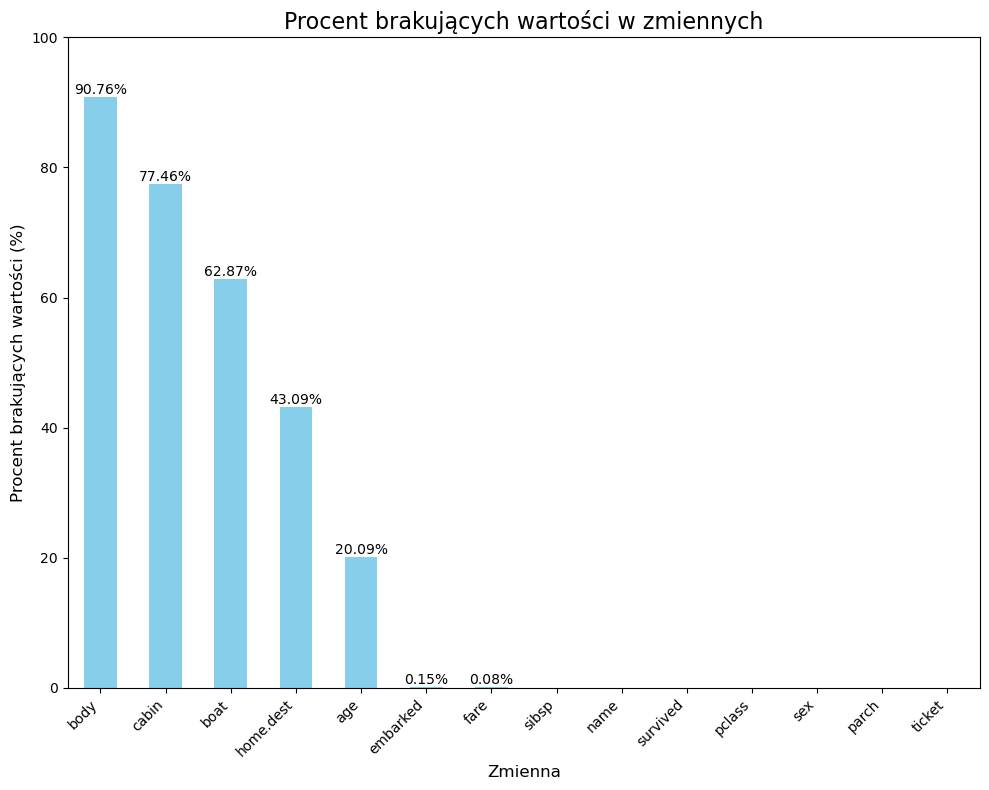

In [16]:
percent_values = missing_values_percentage.round(2)
percent_values_sorted = percent_values.sort_values(ascending=False)
fig, axes = plt.subplots(figsize=(10, 8), facecolor="white")
percent_values_sorted.plot(kind='bar', color='skyblue', ax=axes)
axes.set_title('Procent brakujących wartości w zmiennych', fontsize=16)
axes.set_xlabel('Zmienna', fontsize=12)
axes.set_ylabel('Procent brakujących wartości (%)', fontsize=12)
axes.set_ylim(0, 100) 
for i, v in enumerate(percent_values_sorted):
    if v > 0:  
        axes.text(i, v , f'{v}%', ha='center', va='bottom', fontsize=10) 

plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


# Obserwacje na temat brakujących wartości

Po analizie danych widoczne są znaczące różnice w procentowym udziale brakujących danych w zależności od zmiennej
Dla zmiennych: pclass, survived, name, sex, sibsp, parch, ticket wartość wynosi 0, co oznacza, że wszystkie obserwacje dla tych kolumn są pełne

- fare i embarked -  Te zmienne mają bardzo niski % brakujących danych. Może to wynikać m.in z błędu podczas wprowadzania danych (niektóre osoby w zbiorze danych mogły zapomnieć podać informacje o opłacie za bilet (fare) lub o porcie, z którego wsiadły na statek (embarked))

- age – brakujących danych jest 20,09%, co wskazuje na to, że duża część informacji o wieku pasażerów jest niekompletna.

- cabin – 77,46% brakujących danych, co sugeruje, że większość pasażerów nie miała przypisanego numeru kabiny, lub dane te nie zostały zapisane.

- boat – 62,87% brakujących danych, co może sugerować, że dane te są dostępne tylko dla pasażerów, którzy faktycznie zostali przydzieleni do łodzi ratunkowych.

- body – 90,76% brakujących danych, co wskazuje na to, że jeśli ktoś zginął, to ich ciała mogły być nieodnalezione, lub były ciężkie do zidentyfikowania. Natomiast jeśli ktoś przeyżył to nie był sprawdzany pod tym kątem.

- home.dest – 43,08% brakujących danych, co może wskazywać na brak informacji o  miejscu docelowym podróży lub ta informacja nie została wprowadzona w pełni.

# Przyporządkowanie braków do danego rodzaju braków danych


## Binarny wskaźnik brakujących danych i analiza zależności ze zmienną Survived

In [17]:

columns = ['age', 'fare', 'embarked', 'cabin', 'home.dest', 'body', 'boat']

# pętla, żeby stworzyć kolumny binarne i obliczyć sumę brakujących wartości dla każdej kolumny
for col in columns:
    df[f'{col}Null'] = np.where(df[col].isnull(), 1, 0) # kolumny binarne dla brakujących danych
    sum = df.groupby('survived')[f'{col}Null'].sum() # grupowanie 
    print(f"Liczba brakujących wartości dla '{col}':")
    print(sum)
    print("\n")

# kolumny binarne i sumy brakujących danych w jednej linii
for col in columns:
    df.groupby('survived')[f'{col}'].apply(lambda x: (pd.isnull(x)).sum())




Liczba brakujących wartości dla 'age':
survived
0    190
1     73
Name: ageNull, dtype: int64


Liczba brakujących wartości dla 'fare':
survived
0    1
1    0
Name: fareNull, dtype: int64


Liczba brakujących wartości dla 'embarked':
survived
0    0
1    2
Name: embarkedNull, dtype: int64


Liczba brakujących wartości dla 'cabin':
survived
0    707
1    307
Name: cabinNull, dtype: int64


Liczba brakujących wartości dla 'home.dest':
survived
0    411
1    153
Name: home.destNull, dtype: int64


Liczba brakujących wartości dla 'body':
survived
0    688
1    500
Name: bodyNull, dtype: int64


Liczba brakujących wartości dla 'boat':
survived
0    800
1     23
Name: boatNull, dtype: int64




## Interpretacja wyników

### Age

W przypadku brakujących danych w kolumnie age mamy więcej braków wśród pasażerów, którzy nie przeżyli katastrofy niż wśród tych, którzy przeżyli.
Może to sugerować, że brakujące dane o wieku mogą być powiązane z przeżyciem pasażera, co wprowadza możliwość wystąpienia braku danych w sposób nieprzypadkowy. Zatem, brak danych o wieku może być uznany za przykład braków danych typu MNAR (Missing Not at Random), ponieważ brak tych informacji może wynikać z samego faktu przeżycia katastrofy.

### Fare

Bardzo mała liczba brakujących danych, Brak danych w tej zmiennej jest niemal marginalny, co sugeruje, że brak tych danych jest przypadkowy. Jest to najprawdopodobniej MCAR (Missing Completely at Random), co oznacza, że brak danych w tej zmiennej nie ma związku z przeżyciem.

### Embarked

Zaledwie 2 brakujące dane wśród osób, które przeżyły. Tak mała liczba braków danych sugeruje, że brak danych w tej zmiennej jest także przypadkowy, co sugeruje MCAR (Missing Completely at Random). Brak danych o porcie załadunku nie ma wyraźnego związku z przeżyciem pasażera.

### Cabin

Wysoka liczba brakujących danych w kolumnie Cabin sugeruje, że brak tych danych jest w dużej mierze związany z tym, czy pasażer przeżył. Pasażerowie, którzy zginęli, mogą nie mieć przypisanych kabin w rejestrach, dlatego brak danych o kabinie jest ściśle związany z przeżyciem. Może to wskazywać na przypadek MNAR (Missing Not at Random)


### Home.dest

W tej zmiennej również widać, że więcej braków danych występuje wśród osób, które nie przeżyły katastrofy (411) w porównaniu do tych, które przeżyły (153). Można zauważyć, że brak danych o miejscu docelowym podróży może być również związany z tym, czy pasażer przeżył katastrofę, sugerując przypadek MNAR (Missing Not at Random).

### Body

Kolumna Body zawiera dane o ciałach pasażerów. Brak danych w tej kolumnie jest związany bezpośrednio z przeżyciem pasażera, co sprawia, że mamy do czynienia z brakami MNAR (Missing Not at Random). Pasażerowie, którzy przeżyli katastrofę, nie mieli danych w tej kolumnie, ponieważ nie było potrzeby przypisywania ciała. Pasażerowie, którzy zginęli, mieli przypisane ciało w procesie rejestracji ofiar katastrofy.


### Boat

Bardzo wysoka liczba brakujących danych w kolumnie Boat wśród osób, które nie przeżyły, wskazuje na przypadek MNAR (Missing Not at Random). Pasażerowie, którzy zginęli, nie byli już uwzględniani w danych dotyczących łodzi ratunkowych, co sprawia, że brak tych danych jest związany z przeżyciem pasażera.

- Age: Można imputować brakujące wartości średnią lub medianą dla osób, które przeżyły i osobno dla tych, którzy nie przeżyli.

- Fare: Ponieważ brakujących danych jest tylko 1, najlepiej zastąpić brakującą wartość średnią lub medianą.

- Embarked: Brakujące dane można uzupełnić najczęstszą wartością w kolumnie.

- Cabin: Można stworzyć nową zmienną binarną (1 - miał kabinę, 0 - nie miał) i traktować brakujące dane jako brak kabiny.

- Home.dest: Brakujące dane można uzupełnić na podstawie innych zmiennych (np. klasy pasażera) lub zastąpić najczęstszą wartością.

- Body: Można stworzyć zmienną binarną (1 - miał przypisane ciało, 0 - nie miał). Brakujące dane najlepiej traktować jako osobną kategorię.

- Boat: Można stworzyć zmienną binarną  (1 - był na łodzi ratunkowej, 0 - nie był), a brakujące dane traktować jako brak obecności na łodzi.